In [1]:
#  This part is for generating dataset for tariff

import pandas as pd

# Load the file
file_path = 'solar_madeupdata.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
data.head()

import numpy as np

# Convert datetime column to datetime format
data['datetime'] = pd.to_datetime(data['datetime'], format='%d-%m-%Y %H:%M')

# Define a function to generate the tariff based on time of day and solar output
def generate_tariff(row):
    hour = row['datetime'].hour
    ac_power = row['ac_power_output_kW']

    # Peak tariff: 6 pm to 10 pm
    if 18 <= hour < 22:
        base_tariff = 8.0  # Peak price in INR/kWh
    # Low tariff: 11 pm to 5 am
    elif 23 <= hour or hour < 5:
        base_tariff = 3.0  # Lower price in INR/kWh
    # Surge: 5 am to 8 am
    elif 5 <= hour < 8:
        base_tariff = 5.0
    # Afternoon increase: 12 pm to 3 pm
    elif 12 <= hour < 15:
        base_tariff = 6.0
    else:
        base_tariff = 4.0  # Normal tariff during other hours

    # Modify tariff based on solar power output: lower tariffs when solar energy is high
    if ac_power > 0:
        adjustment = ac_power * 0.1  # decrease the tariff slightly based on solar output
        return max(base_tariff - adjustment, 2.0)  # Ensure minimum tariff is 2 INR/kWh
    else:
        return base_tariff

# Generate the tariff column
data['electricity_tariff_INR_per_kWh'] = data.apply(generate_tariff, axis=1)

# Display the first few rows with the new tariff column
data[['datetime', 'electricity_tariff_INR_per_kWh']].head(30)



C:\Users\DELL\AppData\Local\Temp\ipykernel_86256\2044598498.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,datetime,electricity_tariff_INR_per_kWh
0,2024-07-01 00:00:00,3.000000
1,2024-07-01 01:00:00,3.000000
2,2024-07-01 02:00:00,3.000000
3,2024-07-01 03:00:00,3.000000
4,2024-07-01 04:00:00,3.000000
5,2024-07-01 05:00:00,5.000000
6,2024-07-01 06:00:00,5.000000
7,2024-07-01 07:00:00,5.000000
8,2024-07-01 08:00:00,3.731189
9,2024-07-01 09:00:00,3.789576


C:\Users\DELL\AppData\Local\Temp\ipykernel_66996\3726988497.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Epoch 1/400
32/32 [==============================] - 2s 6ms/step - loss: 0.1437
Epoch 2/400
32/32 [==============================] - 0s 6ms/step - loss: 0.1066
Epoch 3/400
32/32 [==============================] - 0s 7ms/step - loss: 0.0895
Epoch 4/400
32/32 [==============================] - 0s 6ms/step - loss: 0.0717
Epoch 5/400
32/32 [==============================] - 0s 7ms/step - loss: 0.0794
Epoch 6/400
32/32 [==============================] - 0s 7ms/step - loss: 0.0602
Epoch 7/400
32/32 [==============================] - 0s 7ms/step - loss: 0.0564
Epoch 8/400
32/32 [==============================] - 0s 6ms/step - loss: 0.0516
Epoch 9/400
32/32 [==============================] - 0s 7ms/step - loss: 0.0516
Epoch 10/400
32/32 [==============================] - 0s 7ms/step - loss: 0.0431
Epoch 11/400
32/32 [==============================] - 0s 7ms/step - loss: 0.0403
Epoch 12/400
32/32 [==============================] - 0s 7ms/step - loss: 0.0390
Epoch 13/400
32/32 [=================

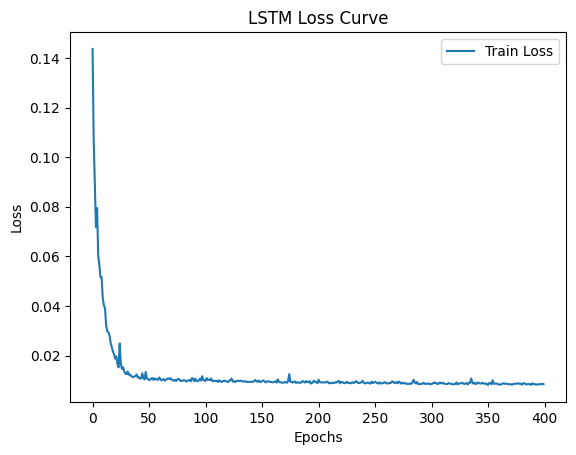

1/1 [==============================] - 0s 288ms/step
Epoch 1/400
32/32 [==============================] - 0s 6ms/step - loss: 0.0087
Epoch 2/400
32/32 [==============================] - 0s 6ms/step - loss: 0.0085
Epoch 3/400
32/32 [==============================] - 0s 6ms/step - loss: 0.0083
Epoch 4/400
32/32 [==============================] - 0s 6ms/step - loss: 0.0087
Epoch 5/400
32/32 [==============================] - 0s 6ms/step - loss: 0.0087
Epoch 6/400
32/32 [==============================] - 0s 6ms/step - loss: 0.0086
Epoch 7/400
32/32 [==============================] - 0s 6ms/step - loss: 0.0082
Epoch 8/400
32/32 [==============================] - 0s 6ms/step - loss: 0.0092
Epoch 9/400
32/32 [==============================] - 0s 6ms/step - loss: 0.0089
Epoch 10/400
32/32 [==============================] - 0s 6ms/step - loss: 0.0087
Epoch 11/400
32/32 [==============================] - 0s 6ms/step - loss: 0.0085
Epoch 12/400
32/32 [==============================] - 0s 6ms/step

KeyboardInterrupt: 

In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the datasets
tariff_data=pd.read_csv(r"C:\Users\DELL\Desktop\luminous\solar_tariff_generated_data.csv")
pred=pd.read_csv('daily_pred.csv')
# print(tariff_data)

# Convert 'datetime' column, inferring format
tariff_data['datetime'] = pd.to_datetime(tariff_data['datetime'], errors='coerce', dayfirst=True)

# Normalize the data using MinMaxScaler
scaler1 = MinMaxScaler()
scaled_tariff_data = scaler1.fit_transform(tariff_data[['electricity_tariff_INR_per_kWh']])

# Prepare sequences for Model 1 (LSTM)
def create_sequences(data,time_steps=24):
    X=[]
    y=[]
    for i in range(len(data) - time_steps):
        X.append(data[i : i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Create sequences for Model 1
time_steps = 24
X1 , y1 = create_sequences(scaled_tariff_data, time_steps)

# Split into training set (first 1000 points)
X1_train = X1[:1000]
y1_train = y1[:1000]

# Build Model 1 (LSTM)
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=False, input_shape=input_shape))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

model = build_lstm_model((X1_train.shape[1],X1_train.shape[2]))
history=model.fit(X1_train, y1_train, epochs=400, batch_size=32, verbose=1)

# Plot the loss curve
plt.plot(history.history['loss'], label='Train Loss')
plt.title('LSTM Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Incremental prediction and retraining
index = 0
interval = 1  #Resting time in seconds

while index + 24 <= len(X1) - 1000:
    # Predict next 24 data points using Model 1 (LSTM)
    X1_next = X1[index+1000:index+1024]
    y1_pred = model.predict(X1_next)

    # Inverse transform Model's predictions 
    tariff_predictions = scaler1.inverse_transform(y1_pred)

    # Making a dataframe to convert to file
    predictions_df = pd.DataFrame({
        'datetime' : tariff_data['datetime'][index + 1000:index+1024],
        'tariff_pred' : tariff_predictions[:,0]
    })

    # Save the predictions to a CSV file (overwrite after each iteration)
    predictions_df.to_csv('tariff_pred.csv', index=False)
    pred['pred_tariff']=tariff_predictions[:,0]
    pred.to_csv('daily_pred.csv', index=False)
    # Simulate waiting for a specified time
    time.sleep(interval)

    # Revise training data and retrain
    index+=24
    X1_train=X1[index:index+1000]
    y1_train=y1[index:index+1000]

    # Retrain model
    model.fit(X1_train, y1_train, epochs=400, batch_size=32, verbose=1)


